In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import scipy.stats as stats
import math


In [2]:
filename = "../Data/merged.csv"
merged = pd.read_csv(filename,index_col=0, encoding = "ISO-8859-1",  sep=',')
merged.head(9)

,sample_id,bases,contigs,windows,reads,mapped_reads,mapped_perc,secondary_alignments,mapped_paired_reads_first,mapped_paired_reads_second,...,chrY_coverage,chrY_deviation,chrM_len,chrM_mapped,chrM_coverage,chrM_deviation,core-result,core-t13,core-t18,core-t21
1,27652,3099922541,195,594,63678538,62732626,0.985146,0,31493578,31239048,...,0.079901,1.047883,16569,24315,1.467500,1.290940,negative,negative,negative,negative
2,27654,3099922541,195,594,56371636,54947834,0.974743,0,27746549,27201285,...,0.075262,1.138690,16569,23162,1.397912,1.198228,negative,negative,negative,negative
3,27656,3099922541,195,594,59334316,58098694,0.979175,0,29171469,28927225,...,0.083667,0.963131,16569,31177,1.881646,1.501025,negative,negative,negative,negative
5,27663,3099922541,195,594,61829824,60385368,0.976638,0,30458549,29926819,...,0.075682,1.031646,16569,50793,3.065544,2.097803,negative,negative,negative,negative
6,27665,3099922541,195,594,60415098,58932430,0.975459,0,29776173,29156257,...,0.070194,0.952894,16569,34095,2.057758,1.456849,negative,negative,negative,negative
7,27672,3099922541,195,594,72725000,70958355,0.975708,0,35625113,35333242,...,0.102880,1.112492,16569,86074,5.194882,2.500239,negative,negative,negative,negative
8,47769,3099922541,195,594,70133838,68936814,0.982932,0,34599932,34336882,...,0.074689,0.912895,16569,28070,1.694128,1.297133,positive,negative,positive,negative
9,47787,3099922541,195,594,65889934,64479479,0.978594,0,32361344,32118135,...,0.088403,0.977519,16569,39963,2.411914,1.717644,negative,negative,negative,negative
10,47800,3099922541,195,594,69751930,68513969,0.982252,0,34370371,34143598,...,0.081646,1.144748,16569,73031,4.407689,3.002479,negative,negative,negative,negative


In [24]:
anomaly = merged[merged['core-result'] == 'positive']
normal = merged[merged['core-result'] == 'negative']

In [25]:
def big_header(chromosome_id):
  print('---------------------')
  print('Chromosome ' + str(chromosome_id))
  print('---------------------')

In [44]:
def col_stats(col_name, merged):
  min = merged[col_name].min()
  max = merged[col_name].max()
  mean = merged[col_name].mean()
  
  print('---------------------')
  print(col_name)
  print('---------------------')
  print('| Min: ' + str(min) + ' | Max: ' + str(max) + ' | Mean: ' + str(mean) + ' |')
  print('---------------------')



In [52]:
def col_plot(col_name, merged, anomaly, normal):
  min = merged[col_name].min()
  max = merged[col_name].max()
  bin_size = (max-min)/100
  if (bin_size == 0):
    bin_size = min*0.01

  bins = np.arange(min-1, max+1, bin_size)

  plt.hist(anomaly[col_name], bins, alpha=1, label='anomaly')
  plt.hist(normal[col_name], bins, alpha=0.5, label='normal')
  plt.legend(loc='upper right')
  plt.xlabel(col_name)
  plt.savefig('./chromosome_img/' + col_name + '.png')
  plt.show()

In [47]:
col_stats('chr1_deviation', merged)

---------------------
chr1_deviation
---------------------
| Min: 1.3137138835693627 | Max: 7.953174020295582 | Mean: 2.8106795849155595 |
---------------------


No handles with labels found to put in legend.


---------------------
Chromosome 1
---------------------


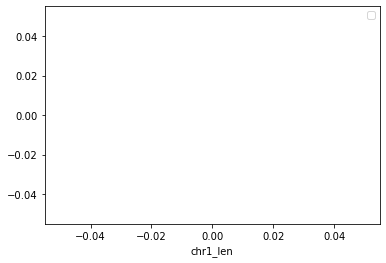

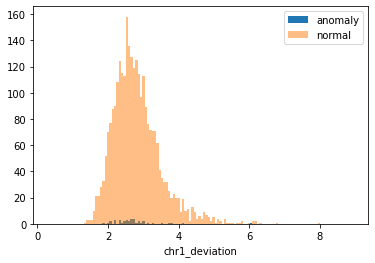

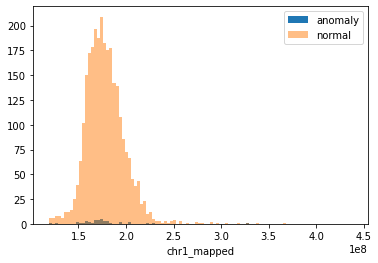

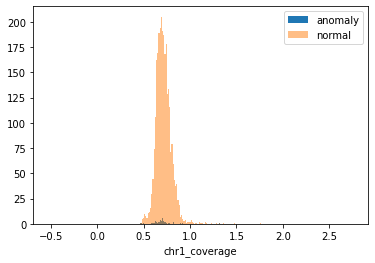

No handles with labels found to put in legend.


---------------------
Chromosome 2
---------------------


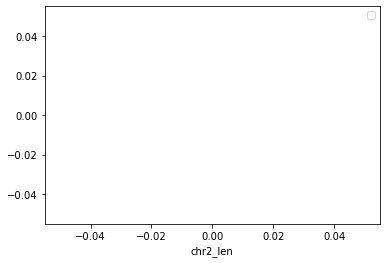

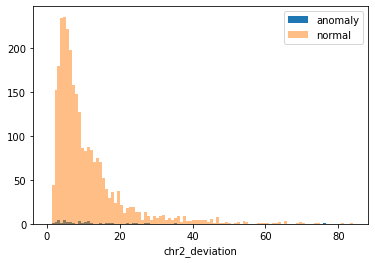

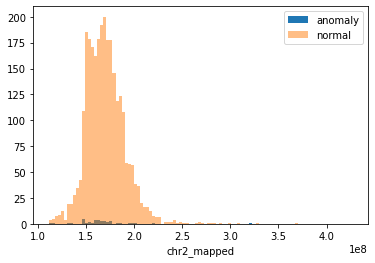

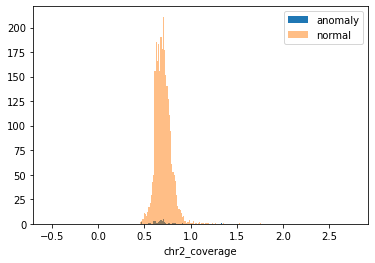

No handles with labels found to put in legend.


---------------------
Chromosome 3
---------------------


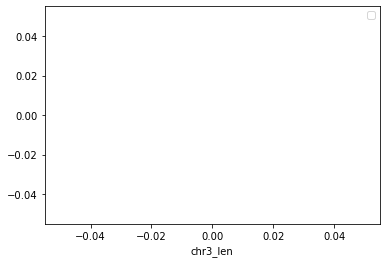

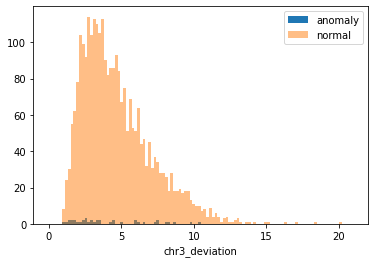

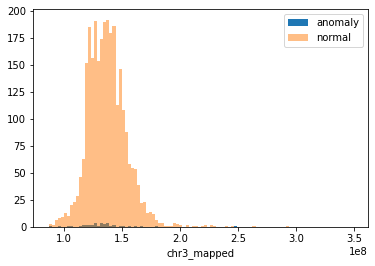

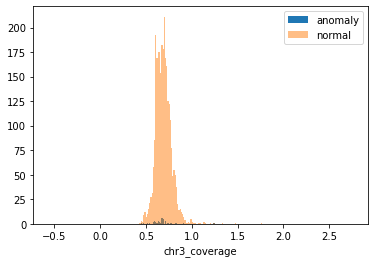

No handles with labels found to put in legend.


---------------------
Chromosome 4
---------------------


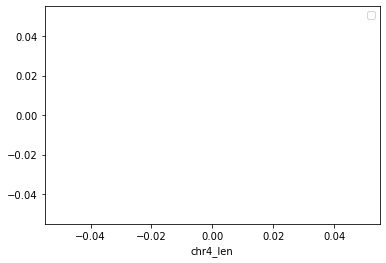

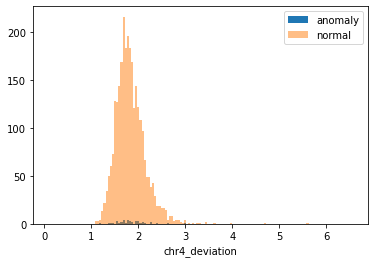

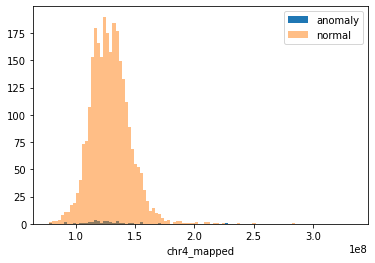

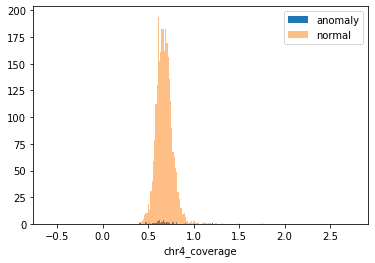

No handles with labels found to put in legend.


---------------------
Chromosome 5
---------------------


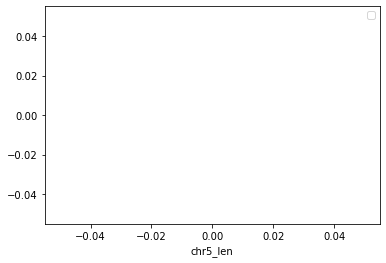

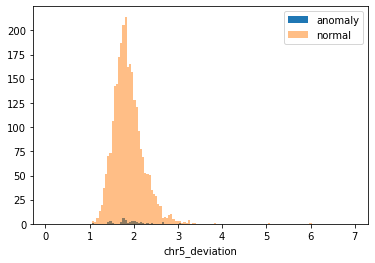

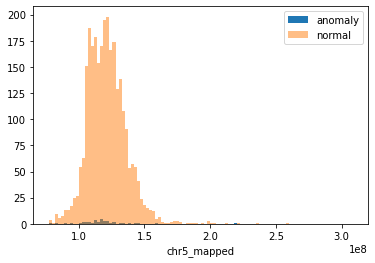

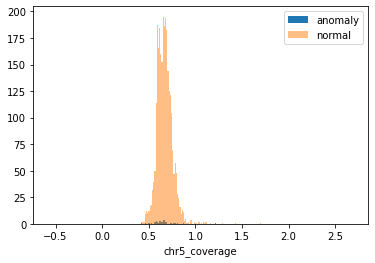

No handles with labels found to put in legend.


---------------------
Chromosome 6
---------------------


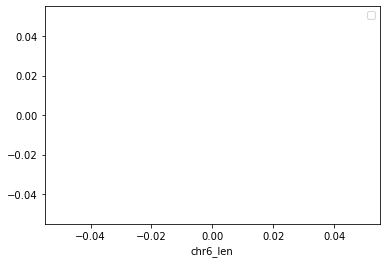

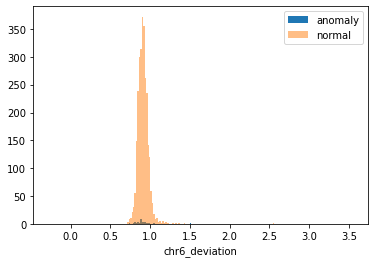

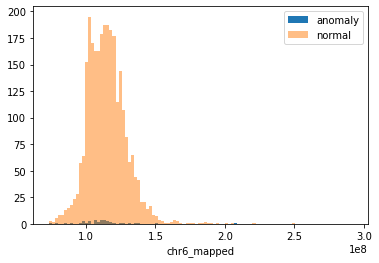

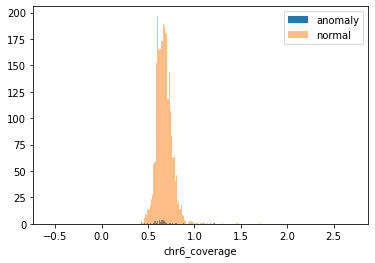

No handles with labels found to put in legend.


---------------------
Chromosome 7
---------------------


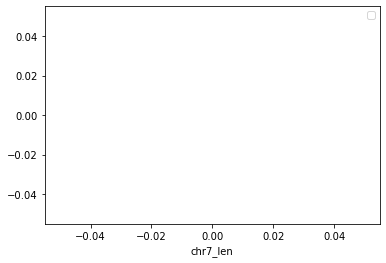

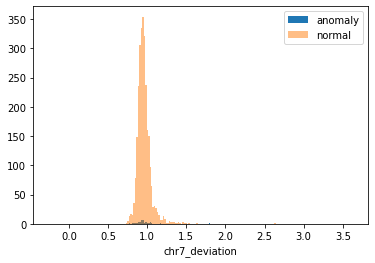

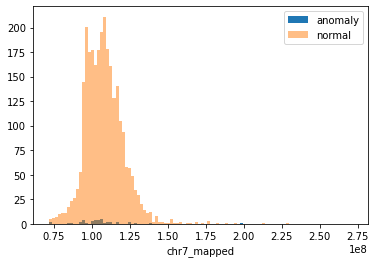

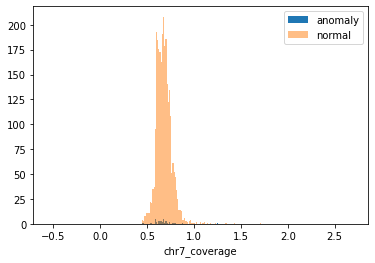

No handles with labels found to put in legend.


---------------------
Chromosome 8
---------------------


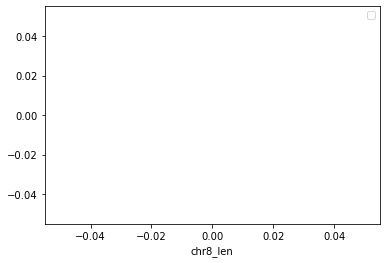

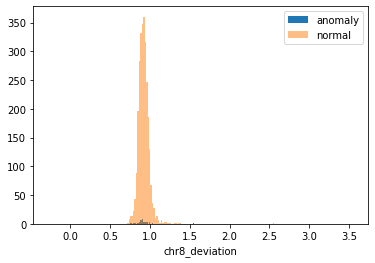

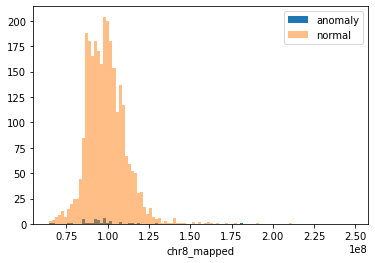

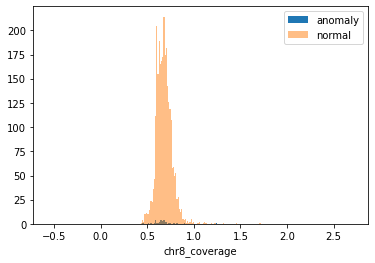

No handles with labels found to put in legend.


---------------------
Chromosome 9
---------------------


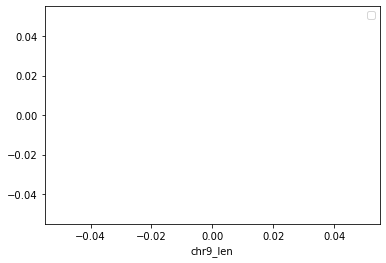

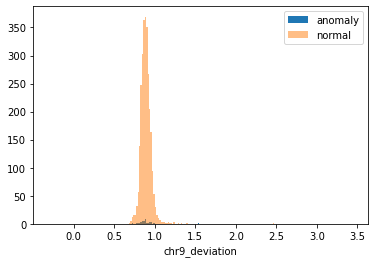

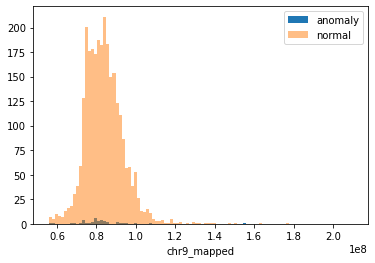

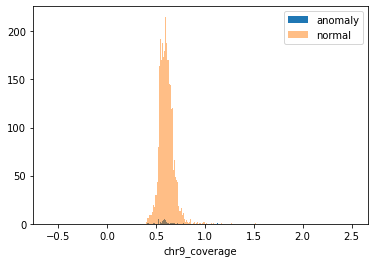

No handles with labels found to put in legend.


---------------------
Chromosome 10
---------------------


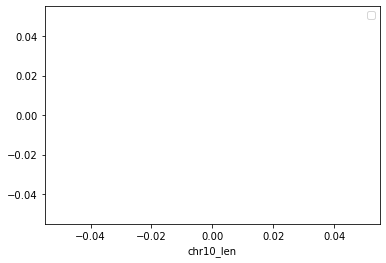

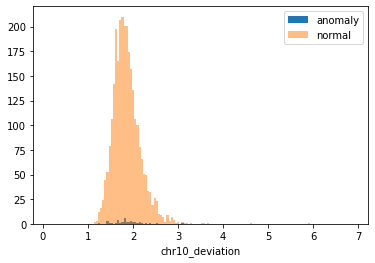

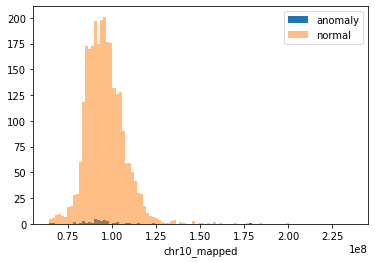

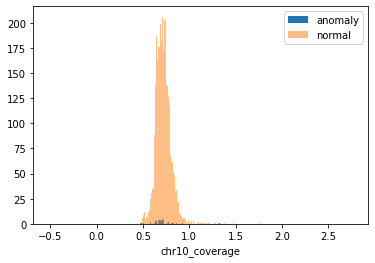

No handles with labels found to put in legend.


---------------------
Chromosome 11
---------------------


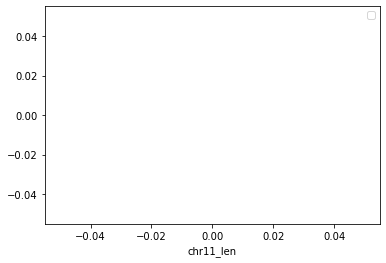

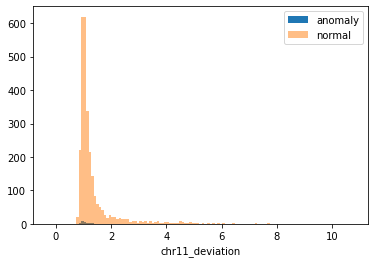

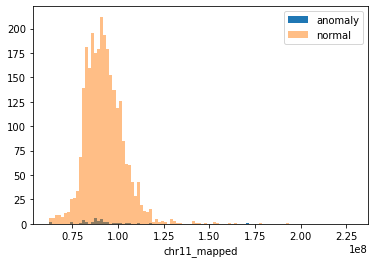

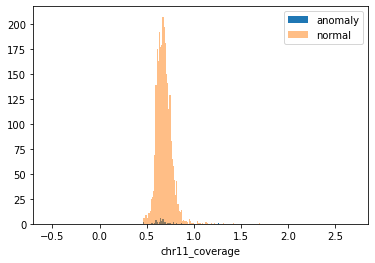

No handles with labels found to put in legend.


---------------------
Chromosome 12
---------------------


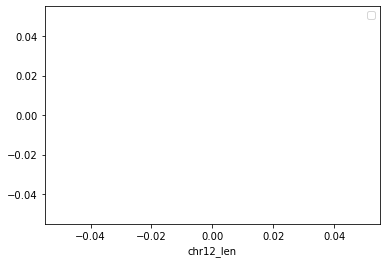

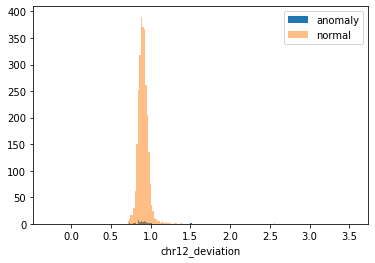

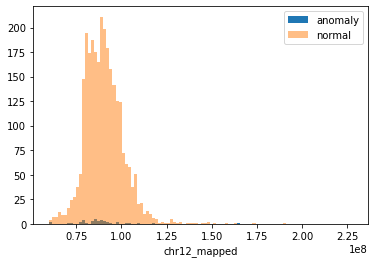

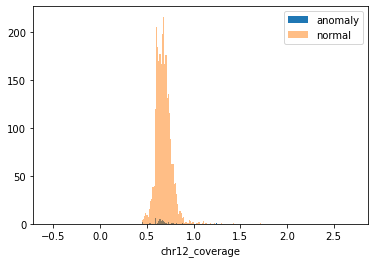

No handles with labels found to put in legend.


---------------------
Chromosome 13
---------------------


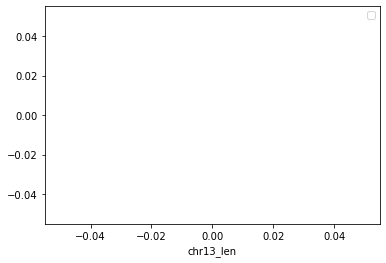

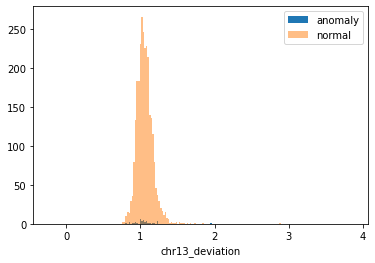

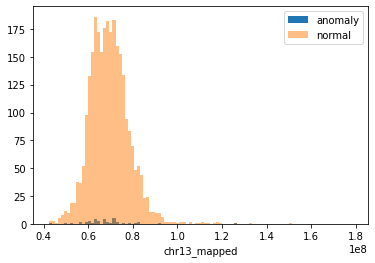

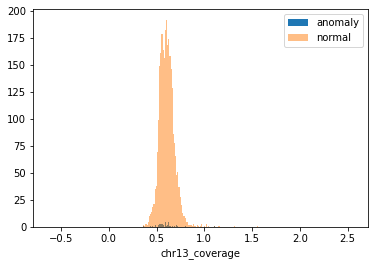

No handles with labels found to put in legend.


---------------------
Chromosome 14
---------------------


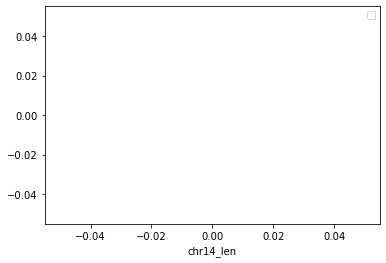

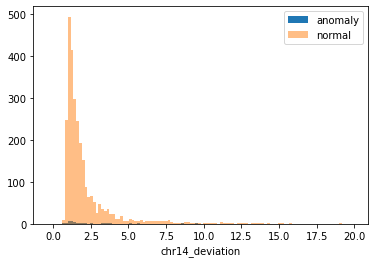

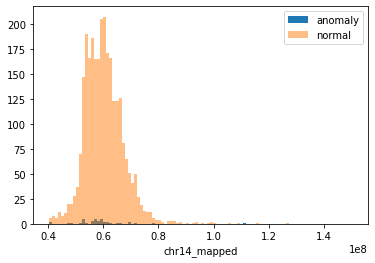

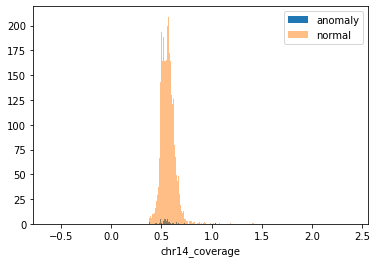

No handles with labels found to put in legend.


---------------------
Chromosome 15
---------------------


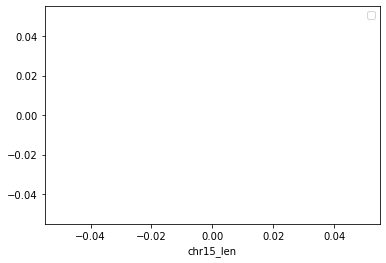

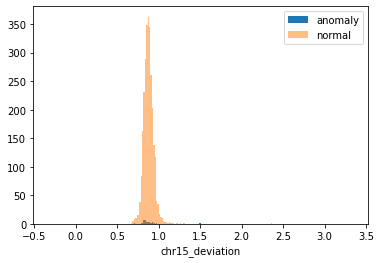

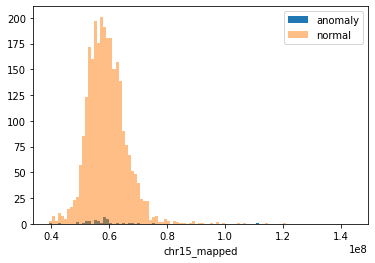

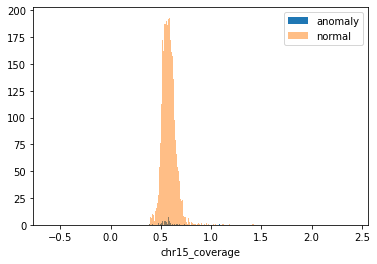

No handles with labels found to put in legend.


---------------------
Chromosome 16
---------------------


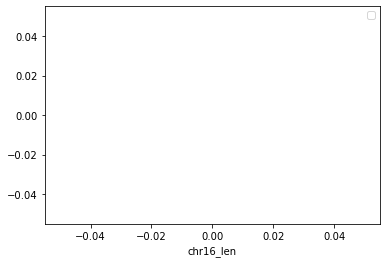

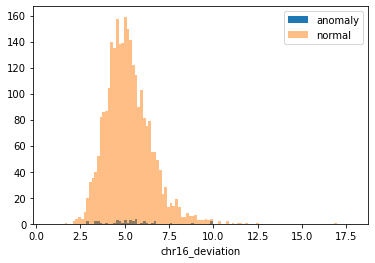

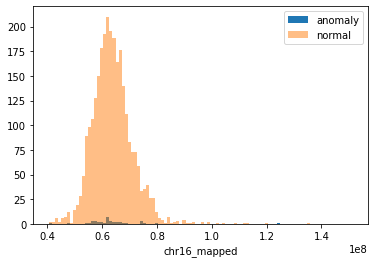

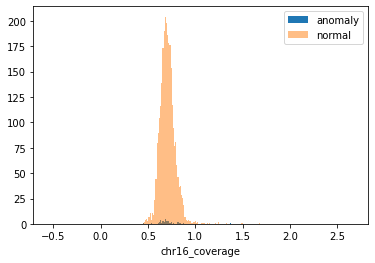

No handles with labels found to put in legend.


---------------------
Chromosome 17
---------------------


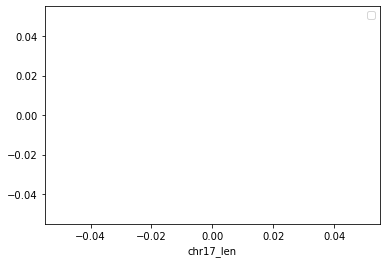

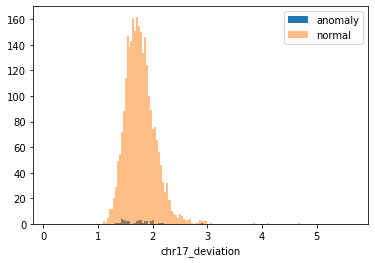

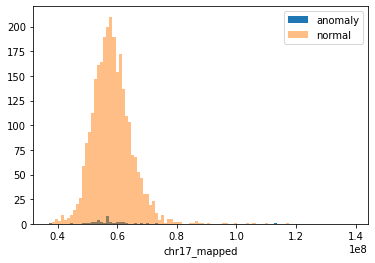

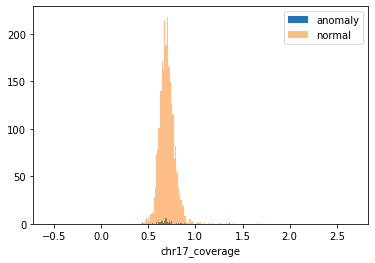

No handles with labels found to put in legend.


---------------------
Chromosome 18
---------------------


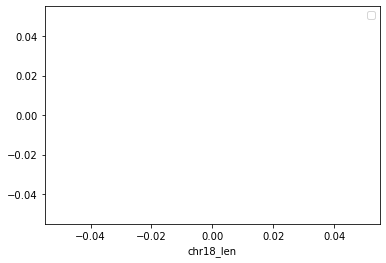

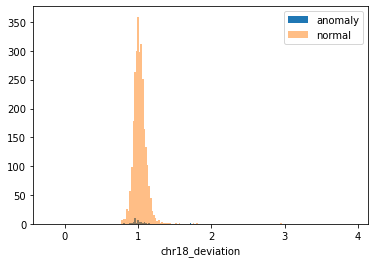

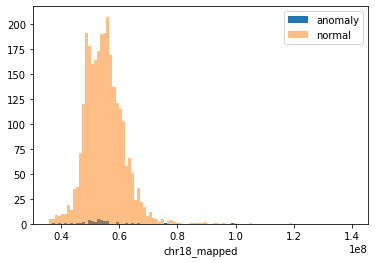

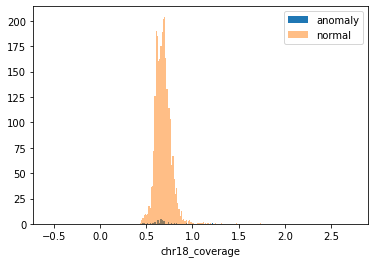

No handles with labels found to put in legend.


---------------------
Chromosome 19
---------------------


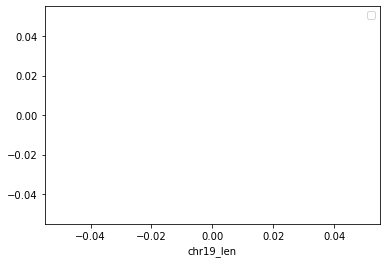

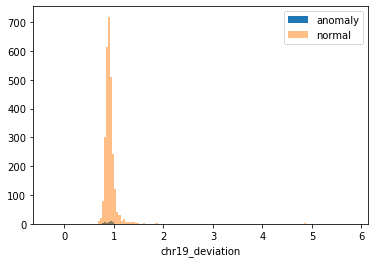

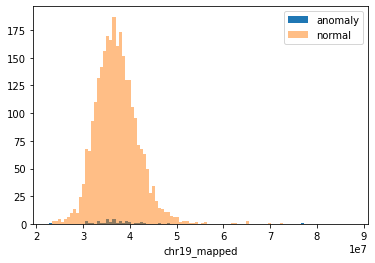

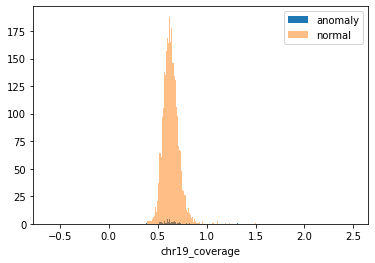

No handles with labels found to put in legend.


---------------------
Chromosome 20
---------------------


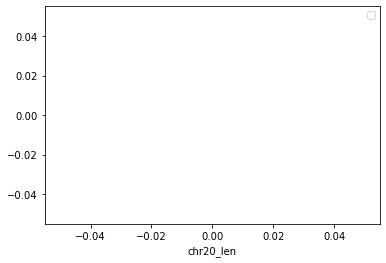

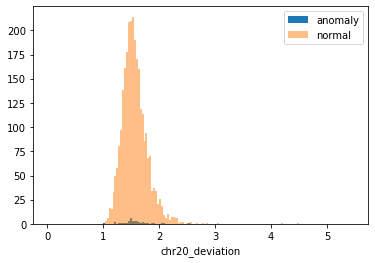

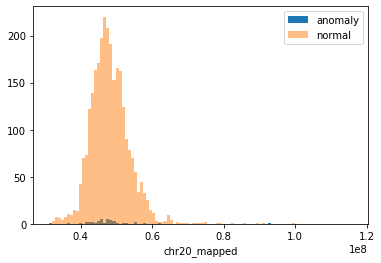

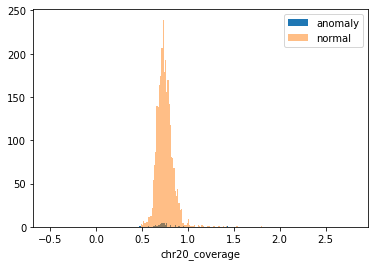

No handles with labels found to put in legend.


---------------------
Chromosome 21
---------------------


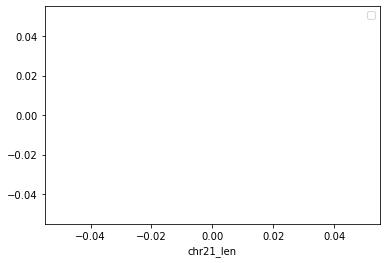

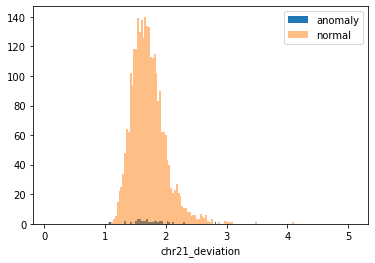

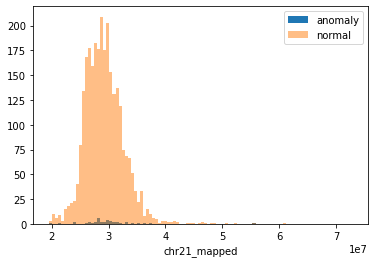

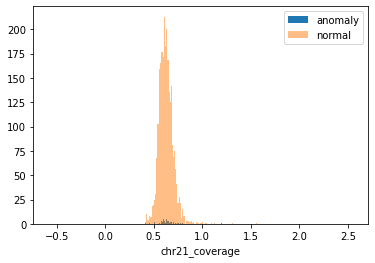

No handles with labels found to put in legend.


---------------------
Chromosome 22
---------------------


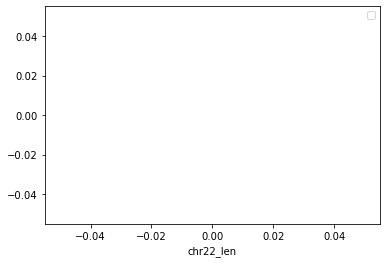

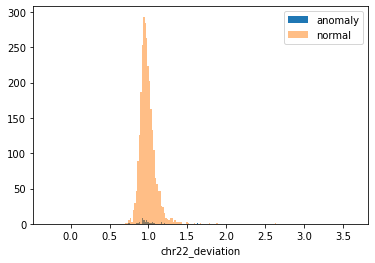

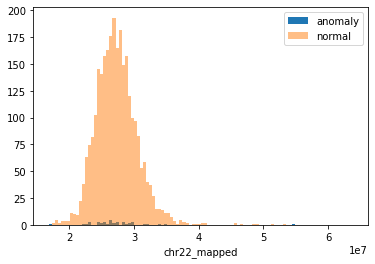

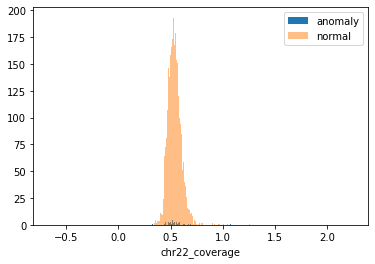

No handles with labels found to put in legend.


---------------------
Chromosome X
---------------------


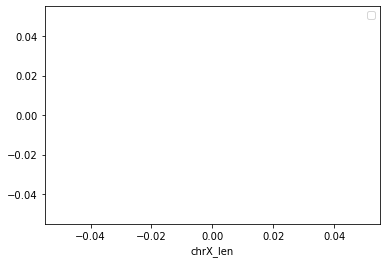

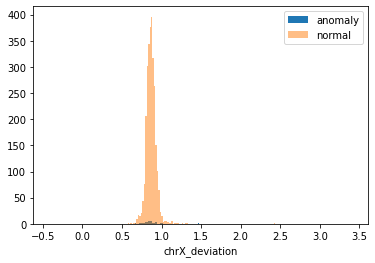

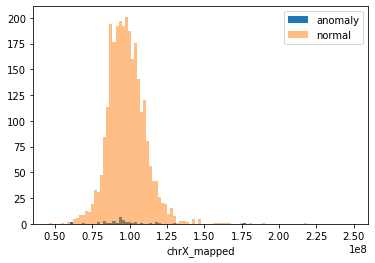

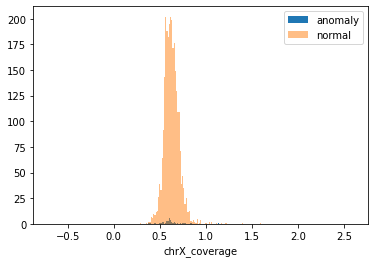

No handles with labels found to put in legend.


---------------------
Chromosome Y
---------------------


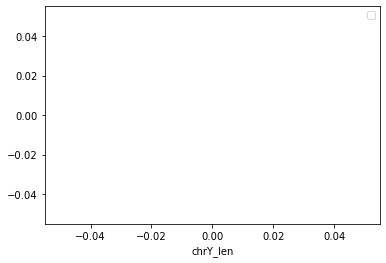

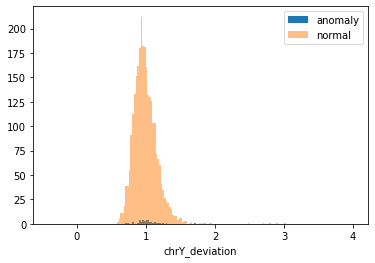

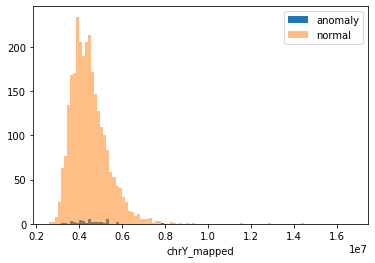

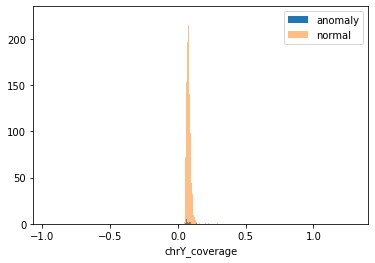

No handles with labels found to put in legend.


---------------------
Chromosome M
---------------------


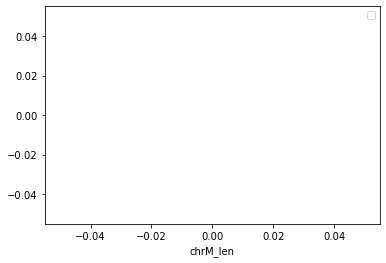

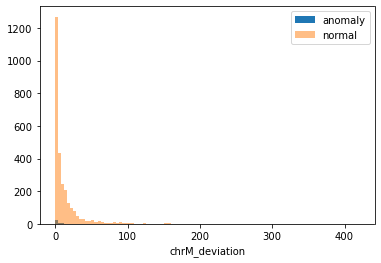

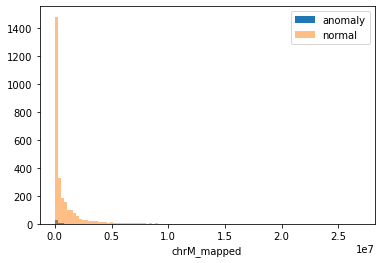

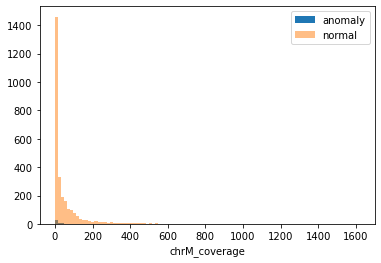

In [53]:
additional_tags = ['X','Y','M']
col_tags = ['_len', '_deviation', '_mapped', '_coverage']

for x in range(22):
  big_header(x+1)
  chr_num = 'chr' + str(x+1)
  for col_tag in col_tags:
    col_name = chr_num + col_tag
    col_plot(col_name, merged, anomaly, normal)
  

for tag in additional_tags:
  big_header(tag)
  chr_num = 'chr' + tag
  for col_tag in col_tags:
    col_name = chr_num + col_tag
    col_plot(col_name, merged, anomaly, normal)

In [ ]:
additional_tags = ['X','Y','M']
col_tags = ['_len', '_deviation', '_mapped', '_coverage']

for x in range(22):
  big_header(x+1)
  chr_num = 'chr' + str(x+1)
  for col_tag in col_tags:
    col_name = chr_num + col_tag
    col_stats(col_name, merged)
  

for tag in additional_tags:
  big_header(tag)
  chr_num = 'chr' + tag
  for col_tag in col_tags:
    col_name = chr_num + col_tag
    col_stats(col_name, merged)